### Голубинов Владислав Андреевич 18-АС (18-ИВТ-1)
5 Вариант, 1 Сеть

In [1]:
#!unzip -uq "/content/drive/My Drive/colab data/lab2cut/pet.zip" -d "/content/drive/My Drive/colab data/lab2cut/pet"

In [58]:
import sys
import os
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import random
import keras
import numpy as np
from PIL import ImageFile
import tensorflow as tf
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as k

In [3]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
nb_classes = 2  # number of classes
img_width, img_height = 299, 299  # change based on the shape/structure of your images
batch_size = 256 # 4, 8, 16, 32, 64, 128, 256 dependent on CPU/GPU memory capacity (powers of 2 values).
transformation_ratio = .05  # how aggressive will be the data augmentation/transformation

train_data_dir = "/content/drive/My Drive/colab data/lab2cut/pet/pet/train"
validation_data_dir = "/content/drive/My Drive/colab data/lab2cut/pet/pet/test"

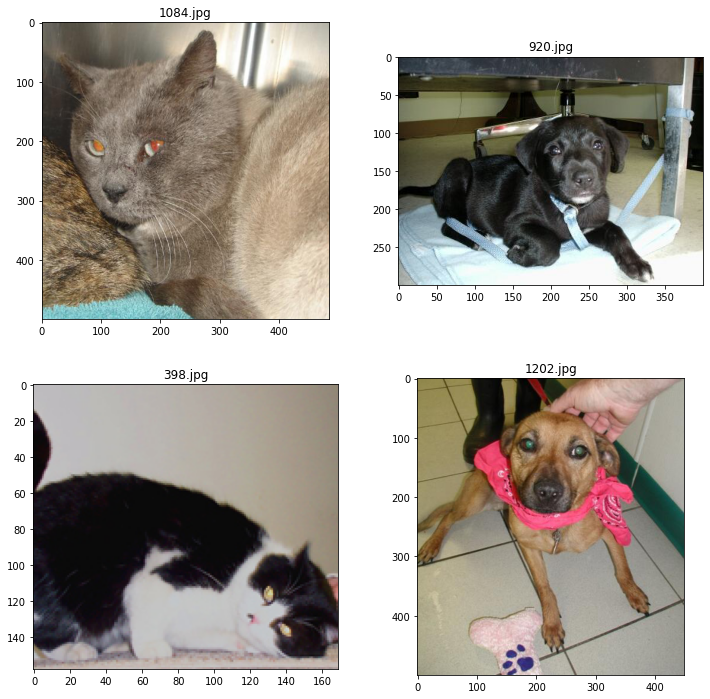

In [4]:
image_dirs = [
              os.path.join(train_data_dir, 'cat'),
              os.path.join(train_data_dir, 'dog'),
]
plt.figure(figsize=[12,12])
for i, path in enumerate([os.path.join(dir, random.choice(os.listdir(dir))) for dir in image_dirs * 2]):
  plt.subplot(2, 2, i+1)
  plt.title(path.split('/')[-1])
  plt.imshow(load_img(path))
plt.show()

In [5]:
base_model = Xception(input_shape=(img_width, img_height, 3), weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(nb_classes, activation='softmax')(x)

model = Model(base_model.input, predictions)
model.summary()

83689472/83683744 [==============================] - 0s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________

In [6]:
for layer in base_model.layers:
    layer.trainable = False

In [7]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=transformation_ratio,
                                   shear_range=transformation_ratio,
                                   zoom_range=transformation_ratio,
                                   cval=transformation_ratio,
                                   horizontal_flip=True,
                                   vertical_flip=True)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

In [8]:
os.makedirs(os.path.join(os.path.abspath(train_data_dir), '../preview'), exist_ok=True)
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 2598 images belonging to 2 classes.


In [9]:
validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                              target_size=(img_width, img_height),
                                                              batch_size=batch_size,
                                                              class_mode='categorical')

Found 402 images belonging to 2 classes.


In [10]:
model.compile(optimizer='nadam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
callbacks_list = [
    EarlyStopping(monitor='accuracy', 
                  patience=5,  # Number of epochs with no improvement after which training will be stopped.
                  verbose=0)
]

In [12]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.n // batch_size,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n // batch_size,
                    verbose=1,
                    callbacks=callbacks_list)

Epoch 1/30
10/10 [==============================] - 1595s 159s/step - loss: 0.5046 - accuracy: 0.8352 - val_loss: 0.3352 - val_accuracy: 0.9844
Epoch 2/30
10/10 [==============================] - 49s 5s/step - loss: 0.2965 - accuracy: 0.9488 - val_loss: 0.1783 - val_accuracy: 0.9844
Epoch 3/30
10/10 [==============================] - 49s 5s/step - loss: 0.2115 - accuracy: 0.9543 - val_loss: 0.1065 - val_accuracy: 0.9922
Epoch 4/30
10/10 [==============================] - 49s 5s/step - loss: 0.1723 - accuracy: 0.9513 - val_loss: 0.0872 - val_accuracy: 0.9883
Epoch 5/30
10/10 [==============================] - 49s 5s/step - loss: 0.1443 - accuracy: 0.9590 - val_loss: 0.0759 - val_accuracy: 0.9844
Epoch 6/30
10/10 [==============================] - 49s 5s/step - loss: 0.1308 - accuracy: 0.9611 - val_loss: 0.0605 - val_accuracy: 0.9922
Epoch 7/30
10/10 [==============================] - 49s 5s/step - loss: 0.1234 - accuracy: 0.9594 - val_loss: 0.0546 - val_accuracy: 0.9883
Epoch 8/30
10/10

In [13]:
# model.save_weights("/content/drive/My Drive/Colab models/lab2/model_wieghts-10.h5")

In [14]:
# model.save("/content/drive/My Drive/Colab models/lab2/model_keras-10.h5")

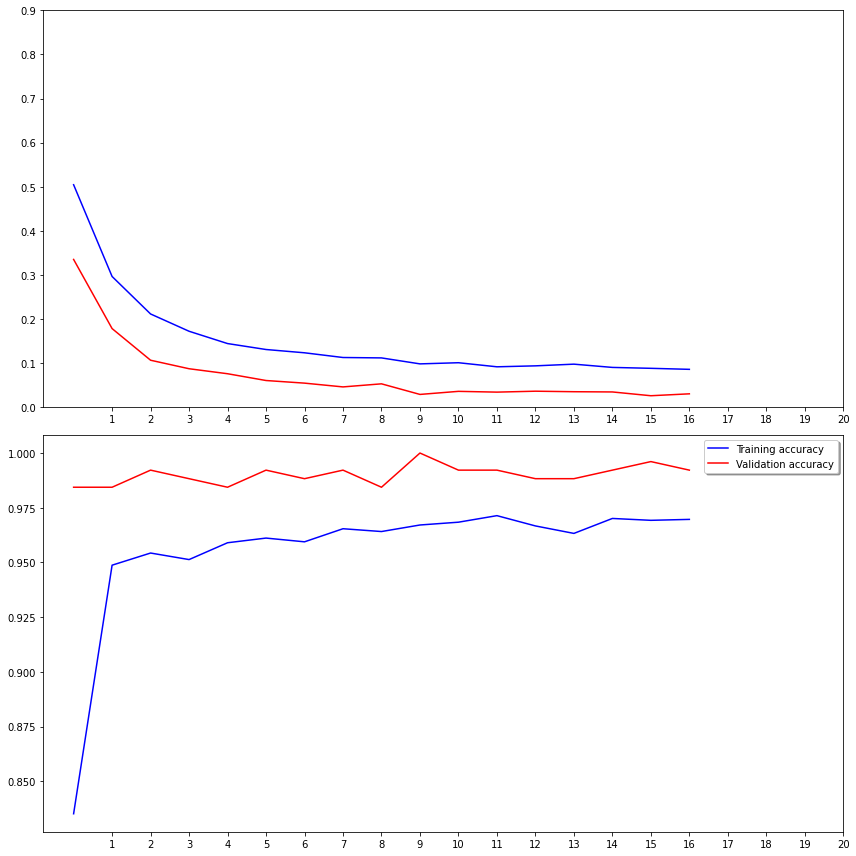

In [15]:
epochs = 21
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [17]:
def preprocess_image(image):
  return np.expand_dims(img_to_array(image), axis=0) / 255.

In [19]:
image_paths = [os.path.join(dir, random.choice(os.listdir(dir))) for dir in image_dirs * 3]
classes = ['cat', 'dog']

for path in image_paths:
  out = model.predict(preprocess_image(load_img(path)))[0]
  print(dict(zip(classes,[round(x, 2) for x in out])), path.split('/')[-1])

{'cat': 1.0, 'dog': 0.0} 282.jpg
{'cat': 0.01, 'dog': 0.99} 1199.jpg
{'cat': 0.97, 'dog': 0.03} 1104.jpg
{'cat': 0.09, 'dog': 0.91} 188.jpg
{'cat': 0.54, 'dog': 0.46} 404.jpg
{'cat': 0.08, 'dog': 0.92} 204.jpg


In [21]:
S = 1

def get_normal_noise(image):
  noise = np.random.normal(128, 20, (image.shape[0], image.shape[1]))
  return np.dstack((noise, noise, noise)).astype(np.uint8)

def add_normal_noise(image):
  noise = get_normal_noise(image) * S
  noise_image = cv2.add(image.astype(np.float64), noise.astype(np.float64))
  cv2.normalize(noise_image, noise_image, 0, 255, cv2.NORM_MINMAX)
  return noise_image

def get_uniform_noise(image):
  noise = np.random.uniform(0, 255, (image.shape[0], image.shape[1]))
  return np.dstack((noise, noise, noise)).astype(np.uint8)

def add_uniform_noise(image):
  noise = get_uniform_noise(image) * S
  noise_image = cv2.add(image.astype(np.float64), noise.astype(np.float64))
  cv2.normalize(noise_image, noise_image, 0, 255, cv2.NORM_MINMAX)
  return noise_image

test_generator_with_normal_noise = ImageDataGenerator(rescale=1./255, preprocessing_function=add_normal_noise).flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
)

test_generator_with_uniform_noise = ImageDataGenerator(rescale=1./255, preprocessing_function=add_uniform_noise).flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
)

Found 402 images belonging to 2 classes.
Found 402 images belonging to 2 classes.


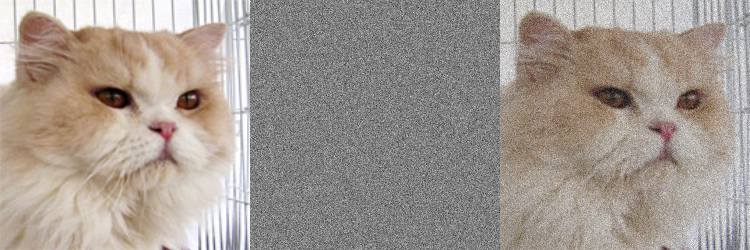

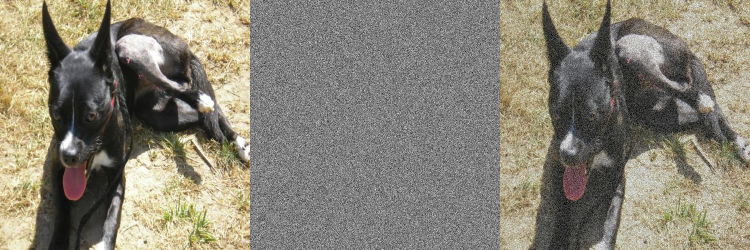

In [22]:
for i, path in zip(list(range(0, 9, 3)),[os.path.join(dir, random.choice(os.listdir(dir))) for dir in image_dirs]):
  image = cv2.resize(cv2.imread(path), (250, 250))
  cv2_imshow(np.concatenate((image, get_normal_noise(image), add_normal_noise(image)), axis=1))

In [23]:
loss, accuracy = model.evaluate(test_generator_with_normal_noise)

2/2 [==============================] - 3s 1s/step - loss: 0.0931 - accuracy: 0.9677


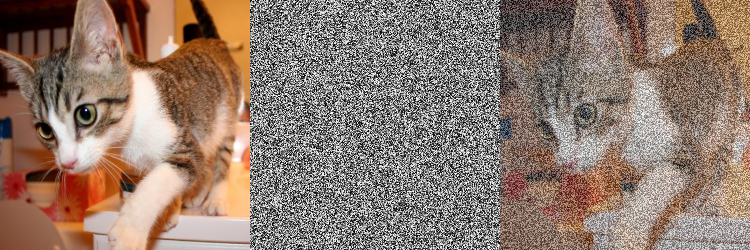

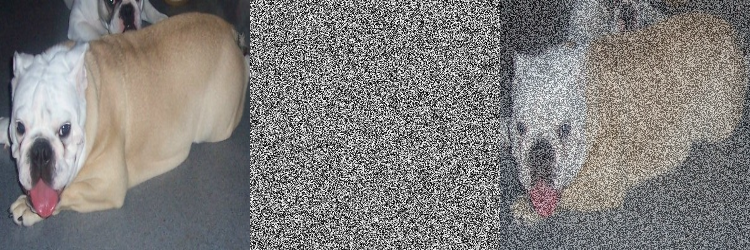

In [24]:
for i, path in zip(list(range(0, 9, 3)),[os.path.join(dir, random.choice(os.listdir(dir))) for dir in image_dirs]):
  image = cv2.resize(cv2.imread(path), (250, 250))
  cv2_imshow(np.concatenate((image, get_uniform_noise(image), add_uniform_noise(image)), axis=1))

In [25]:
loss, accuracy = model.evaluate(test_generator_with_uniform_noise)

2/2 [==============================] - 1s 533ms/step - loss: 0.4596 - accuracy: 0.7836


In [50]:
model.layers[122]

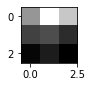

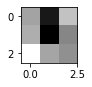

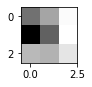

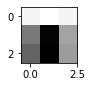

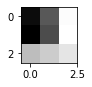

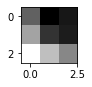

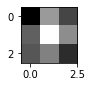

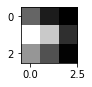

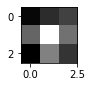

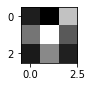

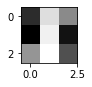

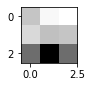

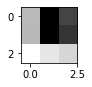

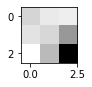

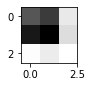

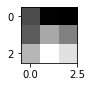

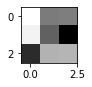

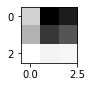

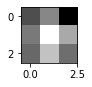

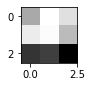

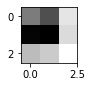

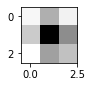

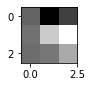

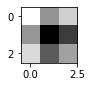

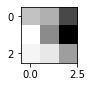

In [42]:
x1w = model.layers[1].get_weights()[0][:,:,0,:]
for i in range(1,26):
  plt.figure(figsize=[10,10])
  plt.subplot(5,5,i)
  plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
  plt.show()

In [52]:
# x1w = model.layers[122].get_weights()[0][:,:,0,:]
# for i in range(1,26):
#   plt.figure(figsize=[10,10])
#   plt.subplot(5,5,i)
#   plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
#   plt.show()

In [63]:
def get_feature_maps(original_model, image_tensor, layer_index):
  model = keras.models.Model(inputs=original_model.inputs, outputs=original_model.layers[layer_index].output)
  print(original_model.layers[layer_index].name)
  return model.predict(image_tensor)

In [80]:
def draw_feature_maps(feature_maps):
  plt.figure(figsize=[64, 64])
  for i, feature_map in enumerate([feature_maps[0, :, :, j] for j in range(feature_maps.shape[-1])]):
    plt.subplot(40, 40, i+1, xticks=([]), yticks=([]))
    plt.imshow(feature_map, cmap='gray')
  plt.show()

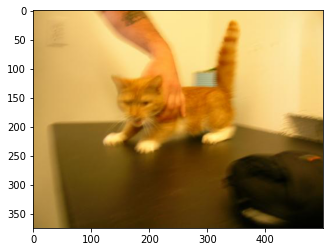

In [81]:
image_path = '/content/drive/My Drive/colab data/lab2cut/pet/pet/train/cat/0.jpg'
image = load_img(image_path)
image_tensor = preprocess_image(image)
plt.imshow(image)

In [82]:
blocks = []
for i, layer in enumerate(model.layers):
  if 'conv' in layer.name and not '_conv' in layer.name:
      blocks.append(i + 2)

print(blocks)

[9, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 23, 24, 28, 29, 30, 31, 32, 33, 34, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 128, 129, 130, 131, 132, 133]


В последней ячейке очень много фоток поэтому я убрал вывод у нее, иначе файл выходит на 300 мб
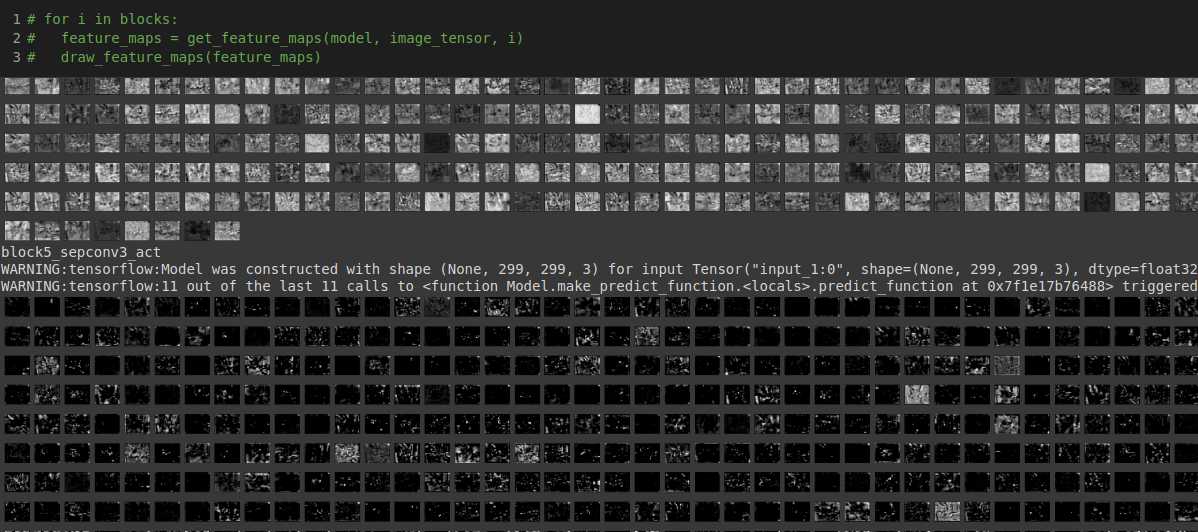

In [84]:
# for i in blocks:
#   feature_maps = get_feature_maps(model, image_tensor, i)
#   draw_feature_maps(feature_maps)